In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('team_data.csv')

Text(0.5, 1.0, 'Correlation Heatmap')

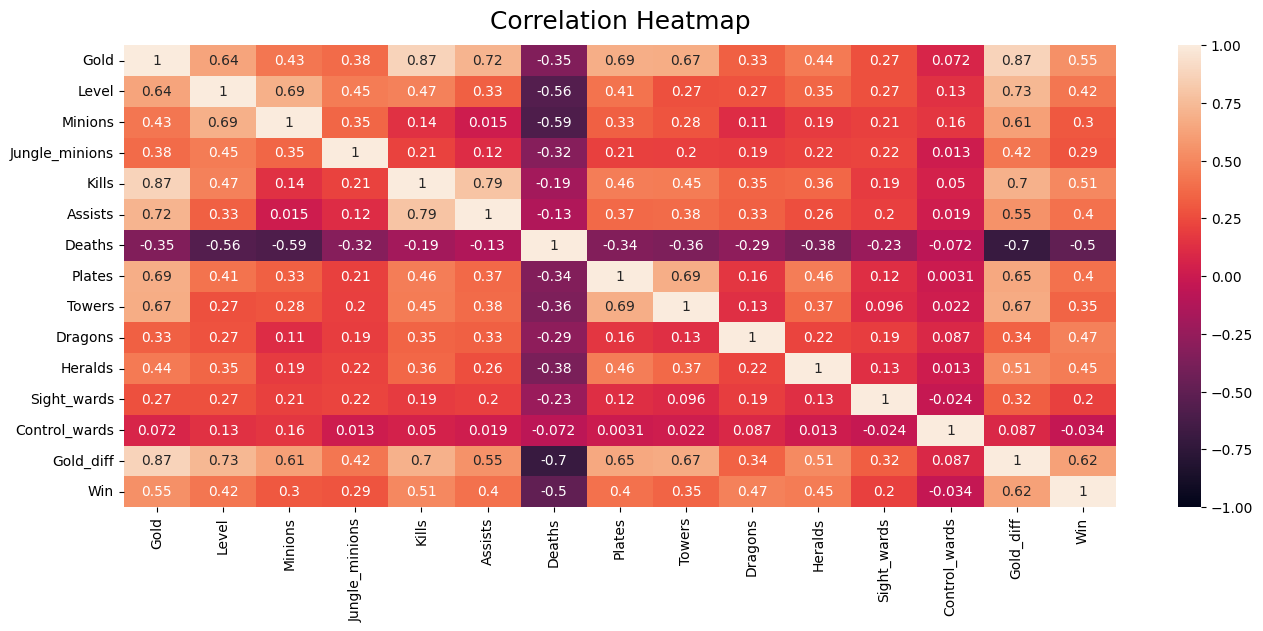

In [40]:
#Generate correlation matrix in orther to see most important values
corr = df.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

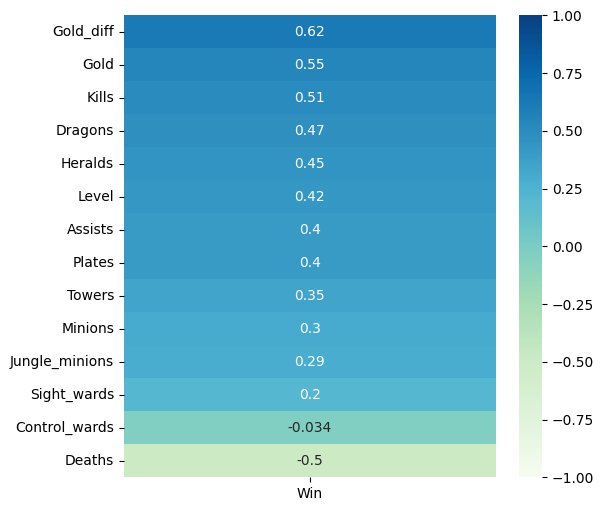

In [6]:
#Generate correlation matrix only of win column
fig, ax = plt.subplots(figsize=((6, 6)))
sns.heatmap(corr["Win"].sort_values(ascending=False).drop("Win").to_frame(), vmin=-1, vmax=1, annot=True,cmap="GnBu")
plt.show()

In [18]:
import matplotlib.pyplot as plt
from sklearn import metrics

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    """
    Displays evaluation metrics including classification report, confusion matrix.

    If the argument 'params' is passed, will display a table of the parameters hyperparameters used in the model.

    Args:
        model (classifier object) : Type of classifier model to use.
        X_train (DataFrame) : Training data with feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with feature variables.
        y_test (Series) : Testing data with target variable.
        digits (int) : Colormap to display correlation range. Default is 4.
        figsize (int, int) : Figure dimensions. Default is (10,5)
        params (bool) : Prints table of hyperparameters used in model.

    Returns:
    """

    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)

    # Classification Report / Scores

    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    print(metrics.classification_report(y_train, y_hat_train, digits=digits))

    print("****CLASSIFICATION REPORT - TEST DATA****")
    print(metrics.classification_report(y_test, y_hat_test, digits=digits))

    print("****CONFUSION MATRIX****")
    fig, axes = plt.subplots(ncols=1, figsize=figsize)

    # Confusion Matrix
    metrics.plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap='Purples', ax=axes)
    axes.set_title('Confusion Matrix')

    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)

def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    """
    Fits model on training data and displays classification evaluation metrics.

    Args:
        model (classifier object) : Type of classifier model to use.
        X_train (DataFrame) : Training data with feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with feature variables.
        y_test (Series) : Testing data with target variable.
        digits (int) : Colormap to display correlation range. Default is 4.
        figsize (int, int) : Figure dimensions. Default is (10,5)
        params (bool) : Prints table of hyperparameters used in model.

    Returns:
        model (classifier object) : Model after fitting on training data.
    """
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, figsize=figsize, params=params)

    return model


In [35]:
#We will first set the complete DataFrames
x_keep_original = ['Level', 'Minions', 'Jungle_minions', 'Kills', 'Assists', 'Deaths', 'Plates', 'Towers', 'Dragons', 'Heralds', 'Sight_wards', 'Control_wards', 'Gold_diff']
X_original = df[x_keep_original]
y_original = df["Win"]

In [36]:
#Do the split for both the orginal and reduced DataFrames
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.8767    0.8767    0.8767        73
           1     0.8732    0.8732    0.8732        71

    accuracy                         0.8750       144
   macro avg     0.8750    0.8750    0.8750       144
weighted avg     0.8750    0.8750    0.8750       144

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.8000    0.8889    0.8421        18
           1     0.8824    0.7895    0.8333        19

    accuracy                         0.8378        37
   macro avg     0.8412    0.8392    0.8377        37
weighted avg     0.8423    0.8378    0.8376        37

****CONFUSION MATRIX****


C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


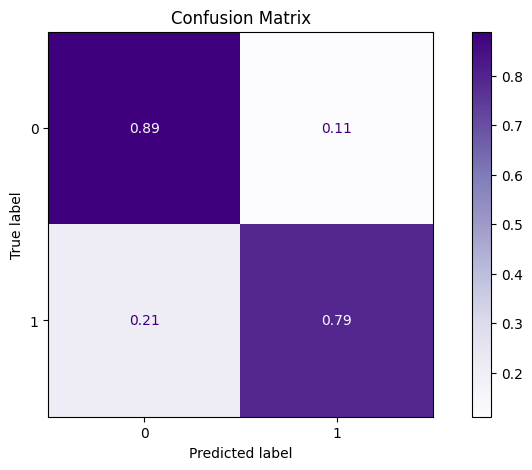

In [37]:
#Logisitc regression using the original df
log_select = fit_eval(LogisticRegression(), X_train_original, y_train_original, X_test_original, y_test_original)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        73
           1     1.0000    1.0000    1.0000        71

    accuracy                         1.0000       144
   macro avg     1.0000    1.0000    1.0000       144
weighted avg     1.0000    1.0000    1.0000       144

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.8333    0.8333    0.8333        18
           1     0.8421    0.8421    0.8421        19

    accuracy                         0.8378        37
   macro avg     0.8377    0.8377    0.8377        37
weighted avg     0.8378    0.8378    0.8378        37

****CONFUSION MATRIX****


C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


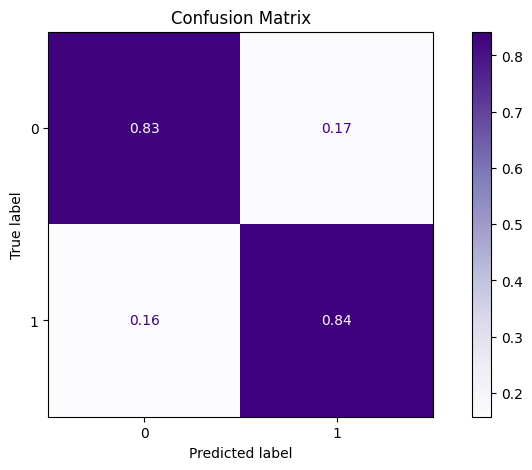

In [38]:
#Decision Tree using the original df
log_select = fit_eval(DecisionTreeClassifier(), X_train_original, y_train_original, X_test_original, y_test_original)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        73
           1     1.0000    1.0000    1.0000        71

    accuracy                         1.0000       144
   macro avg     1.0000    1.0000    1.0000       144
weighted avg     1.0000    1.0000    1.0000       144

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.8333    0.8333    0.8333        18
           1     0.8421    0.8421    0.8421        19

    accuracy                         0.8378        37
   macro avg     0.8377    0.8377    0.8377        37
weighted avg     0.8378    0.8378    0.8378        37

****CONFUSION MATRIX****


C:\Users\zabit\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


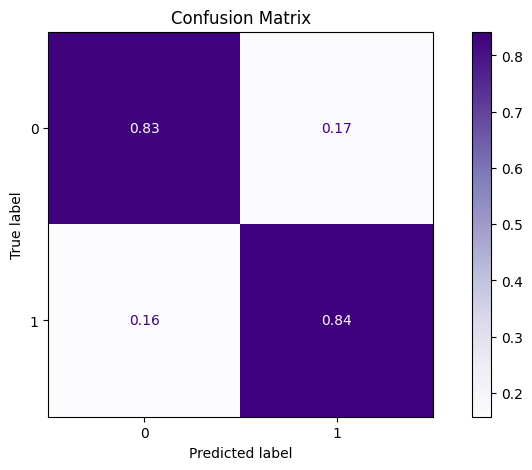

In [39]:
#Random Forest using the original df
log_select = fit_eval(RandomForestClassifier(), X_train_original, y_train_original, X_test_original, y_test_original)